### Notebook 1: LSOA Data Prep – NHS South West

- Load national LSOA & NHS region boundaries
- Clip LSOAs to NHS South West
- Save as GeoPackage for fast analysis


In [9]:
import os
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as ctx

sns.set(style="whitegrid", palette="pastel")
warnings.filterwarnings("ignore")

RAW_DATA_DIR = "../data/raw"
PROCESSED_DATA_DIR = "../data/processed"
SHAPEFILE_DIR_NAME = "lsoa_shapefile"
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

LSOA_NATIONAL_SHP_PATH = os.path.join(RAW_DATA_DIR, SHAPEFILE_DIR_NAME, "Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).shp")
NHS_REGIONS_SHP_PATH = os.path.join(RAW_DATA_DIR, "NHS_England_Regions_December_2023", "NHSER_DEC_2023_EN_BFC.shp")
LSOA_SOUTH_WEST_OUTPUT_PATH = os.path.join(PROCESSED_DATA_DIR, "lsoa_south_west.gpkg")


In [10]:
# ## Environment Check

import sys
import numpy
import pandas
import geopandas

print(f"Python Executable: {sys.executable}")
print(f"NumPy version: {numpy.__version__}")
print(f"Pandas version: {pandas.__version__}")
print(f"GeoPandas version: {geopandas.__version__}")
print(f"Working Directory: {os.getcwd()}")

Python Executable: /opt/anaconda3/envs/research_geo_env/bin/python
NumPy version: 1.25.2
Pandas version: 2.2.3
GeoPandas version: 1.0.1
Working Directory: /Users/rosstaylor/Downloads/Research Project/Code Folder/Research Project - Geospatial Health Demand/notebooks


In [11]:
# ## Load National LSOA Shapefile

if not os.path.exists(LSOA_NATIONAL_SHP_PATH):
    raise FileNotFoundError(f"National LSOA shapefile not found at: {LSOA_NATIONAL_SHP_PATH}")

print(f"Loading LSOA boundaries from: {LSOA_NATIONAL_SHP_PATH}")
lsoa_national_gdf = gpd.read_file(LSOA_NATIONAL_SHP_PATH)
lsoa_national_gdf = lsoa_national_gdf[lsoa_national_gdf.geometry.is_valid]
print(f"{len(lsoa_national_gdf)} valid LSOA polygons loaded.")


Loading LSOA boundaries from: ../data/raw/lsoa_shapefile/Lower_layer_Super_Output_Areas_(December_2021)_Boundaries_EW_BFC_(V10).shp
35666 valid LSOA polygons loaded.


In [12]:
# ## Load NHS England Regions Shapefile

if not os.path.exists(NHS_REGIONS_SHP_PATH):
    raise FileNotFoundError(f"NHS regions shapefile not found at: {NHS_REGIONS_SHP_PATH}")

nhs_regions_gdf = gpd.read_file(NHS_REGIONS_SHP_PATH)
print(f"{len(nhs_regions_gdf)} NHS region polygons loaded.")

7 NHS region polygons loaded.


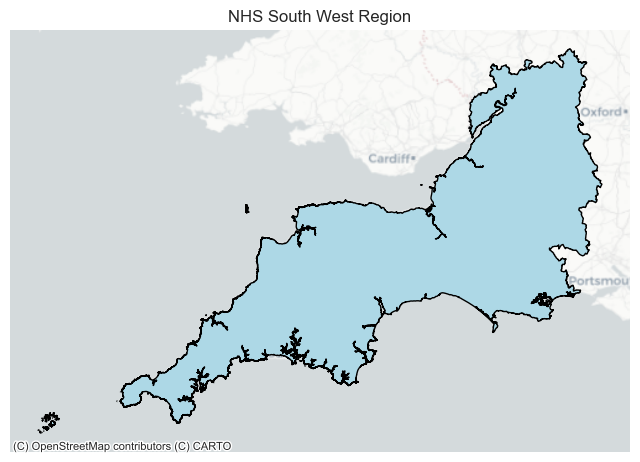

In [13]:
# ## Filter to NHS South West Region

SOUTH_WEST_REGION_NAME = "South West"
sw_region_gdf = nhs_regions_gdf[nhs_regions_gdf["NHSER23NM"] == SOUTH_WEST_REGION_NAME]
if sw_region_gdf.empty:
    raise ValueError("No South West region found in NHS regions shapefile.")

fig, ax = plt.subplots(figsize=(8, 8))
sw_region_gdf.plot(ax=ax, edgecolor='black', facecolor='lightblue')
ctx.add_basemap(ax, crs=sw_region_gdf.crs.to_string(), source=ctx.providers.CartoDB.Positron)
ax.set_title("NHS South West Region")
ax.axis('off')
plt.show()

Clipped to 3472 LSOAs in the South West.


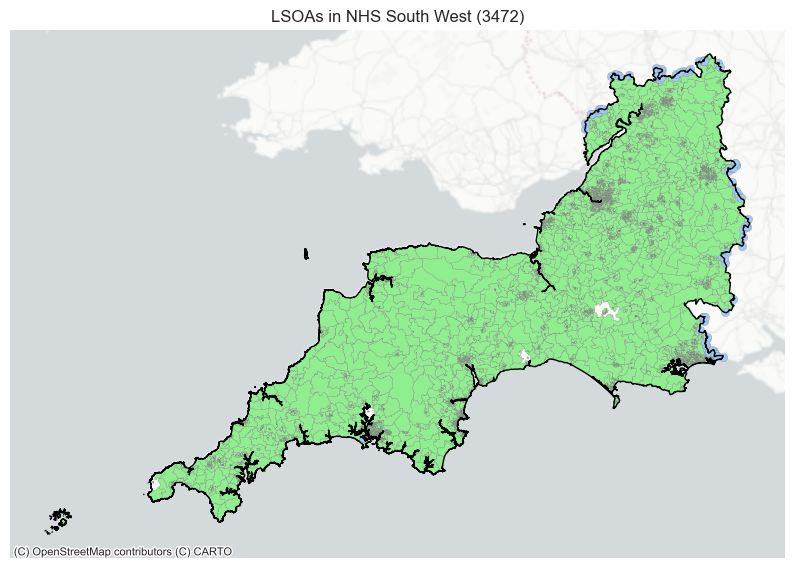

In [14]:
# ## Clip LSOAs to the South West Region

if lsoa_national_gdf.crs != sw_region_gdf.crs:
    lsoa_national_gdf = lsoa_national_gdf.to_crs(sw_region_gdf.crs)
lsoa_sw_gdf = gpd.clip(lsoa_national_gdf, sw_region_gdf.unary_union)
print(f"Clipped to {len(lsoa_sw_gdf)} LSOAs in the South West.")

fig, ax = plt.subplots(figsize=(10, 10))
lsoa_sw_gdf.plot(ax=ax, edgecolor='gray', facecolor='lightgreen', linewidth=0.2)
sw_region_gdf.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
ctx.add_basemap(ax, crs=lsoa_sw_gdf.crs.to_string(), source=ctx.providers.CartoDB.PositronNoLabels)
ax.set_title(f"LSOAs in NHS South West ({len(lsoa_sw_gdf)})")
ax.axis('off')
plt.show()

In [8]:
# ## Save Output

lsoa_sw_gdf.to_file(LSOA_SOUTH_WEST_OUTPUT_PATH, driver="GPKG", layer="lsoa_south_west")
print(f"Saved South West LSOAs to: {LSOA_SOUTH_WEST_OUTPUT_PATH}")

Saved South West LSOAs to: ../data/processed/lsoa_south_west.gpkg
